In [1]:
!wget ! unzip http://jitectechnologies.in/wp-content/uploads/2021/10/Database.zip

--2021-10-11 18:35:48--  http://!/
Resolving ! (!)... failed: Name or service not known.
wget: unable to resolve host address ‘!’
--2021-10-11 18:35:48--  http://unzip/
Resolving unzip (unzip)... failed: Name or service not known.
wget: unable to resolve host address ‘unzip’
--2021-10-11 18:35:48--  http://jitectechnologies.in/wp-content/uploads/2021/10/Database.zip
Resolving jitectechnologies.in (jitectechnologies.in)... 138.128.163.162
Connecting to jitectechnologies.in (jitectechnologies.in)|138.128.163.162|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2185319 (2.1M) [application/zip]
Saving to: ‘Database.zip’

Database.zip        100%[===================>]   2.08M  4.07MB/s    in 0.5s    

2021-10-11 18:35:49 (4.07 MB/s) - ‘Database.zip’ saved [2185319/2185319]

FINISHED --2021-10-11 18:35:49--
Total wall clock time: 0.9s
Downloaded: 1 files, 2.1M in 0.5s (4.07 MB/s)


In [2]:
! unzip Database.zip

Archive:  Database.zip
   creating: Database/
   creating: Database/BAD/
  inflating: Database/BAD/1.jpg      
  inflating: Database/BAD/10.jpg     
  inflating: Database/BAD/100.jpg    
  inflating: Database/BAD/11.jpg     
  inflating: Database/BAD/12.jpg     
  inflating: Database/BAD/13.jpg     
  inflating: Database/BAD/14.jpg     
  inflating: Database/BAD/15.jpg     
  inflating: Database/BAD/16.jpg     
  inflating: Database/BAD/17.jpg     
  inflating: Database/BAD/18.jpg     
  inflating: Database/BAD/19.jpg     
  inflating: Database/BAD/2.jpg      
  inflating: Database/BAD/20.jpg     
  inflating: Database/BAD/21.jpg     
  inflating: Database/BAD/22.jpg     
  inflating: Database/BAD/23.jpg     
  inflating: Database/BAD/24.jpg     
  inflating: Database/BAD/25.jpg     
  inflating: Database/BAD/26.jpg     
  inflating: Database/BAD/27.jpg     
  inflating: Database/BAD/28.jpg     
  inflating: Database/BAD/29.jpg     
  inflating: Database/BAD/3.jpg      
  inflating: Da

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

os.chdir('/content/drive/MyDrive')

In [4]:
batch_size = 32
img_height = 256
img_width = 256

In [5]:
data_dir='/content/Database'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 160 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['BAD', 'GOOD']


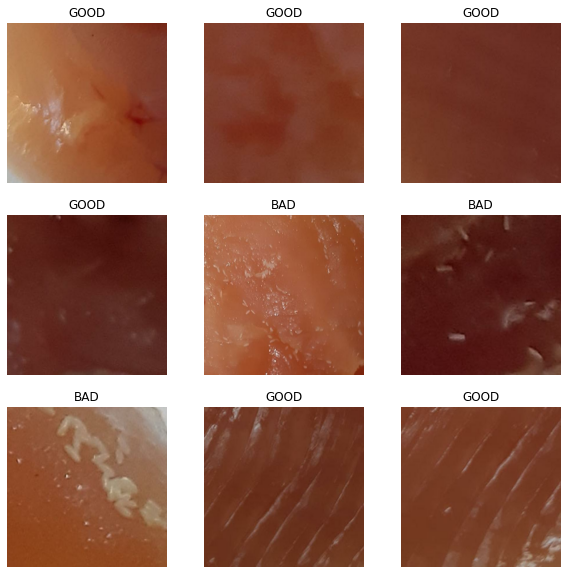

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
num_classes=2

In [10]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [13]:
epochs=200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/200
5/5 [==============================] - 17s 112ms/step - loss: 0.7069 - accuracy: 0.4875 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/200
5/5 [==============================] - 0s 57ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6880 - val_accuracy: 0.5250
Epoch 3/200
5/5 [==============================] - 0s 56ms/step - loss: 0.6854 - accuracy: 0.5688 - val_loss: 0.6474 - val_accuracy: 0.8250
Epoch 4/200
5/5 [==============================] - 0s 59ms/step - loss: 0.6211 - accuracy: 0.6375 - val_loss: 0.6157 - val_accuracy: 0.7000
Epoch 5/200
5/5 [==============================] - 0s 60ms/step - loss: 0.5811 - accuracy: 0.7188 - val_loss: 0.5862 - val_accuracy: 0.8500
Epoch 6/200
5/5 [==============================] - 0s 55ms/step - loss: 0.6010 - accuracy: 0.6750 - val_loss: 0.5543 - val_accuracy: 0.8500
Epoch 7/200
5/5 [==============================] - 0s 57ms/step - loss: 0.6113 - accuracy: 0.7125 - val_loss: 0.6006 - val_accuracy: 0.7000
Epoch 8/200
5/5 [=

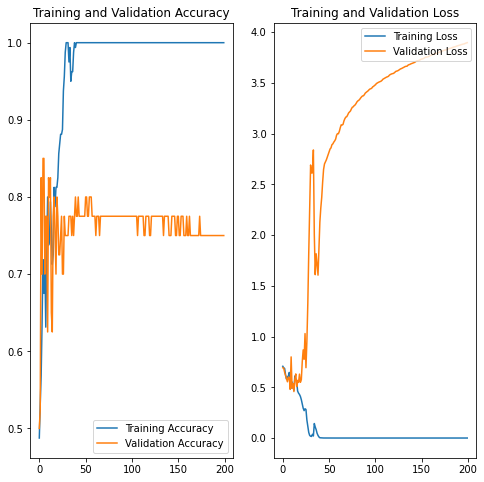

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()